In [8]:
from pathlib import Path

In [10]:
from datetime import datetime, date
import matplotlib.pyplot as plt


In [11]:
import src
import importlib

importlib.reload(src)

when = src.When(
    first_interval=datetime(2018, 1, 1),
    last_interval=datetime(2020, 12, 31),
    feather_location=Path('photos-limited.feather').resolve(),
    pictures_root=[
        Path('/Users/visgean/Dropbox/Photos/2018').resolve(),
        Path('/Users/visgean/Dropbox/Photos/2019').resolve(),
        Path('/Users/visgean/Dropbox/Photos/2020').resolve(),
    ],
    processes=5
)

<AxesSubplot: ylabel='admin2'>

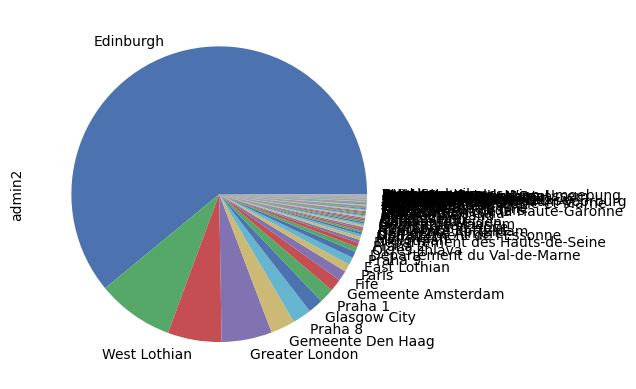

In [12]:
when.countries_df.admin2.value_counts().plot(kind='pie')


<AxesSubplot: ylabel='cc'>

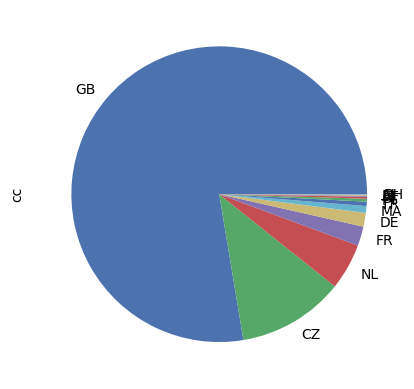

In [13]:
when.countries_df.cc.value_counts().plot(kind='pie')

/var/folders/t9/wn516khd6p1b9l2g2lmm4qh40000gn/T/ipykernel_38688/994869956.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
/var/folders/t9/wn516khd6p1b9l2g2lmm4qh40000gn/T/ipykernel_38688/994869956.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  when.day_df['country_code'].hist(by=when.day_df.index.year, ax=ax, rwidth=0.5)


array([[<AxesSubplot: title={'center': '2017'}>,
        <AxesSubplot: title={'center': '2018'}>],
       [<AxesSubplot: title={'center': '2019'}>,
        <AxesSubplot: title={'center': '2020'}>]], dtype=object)

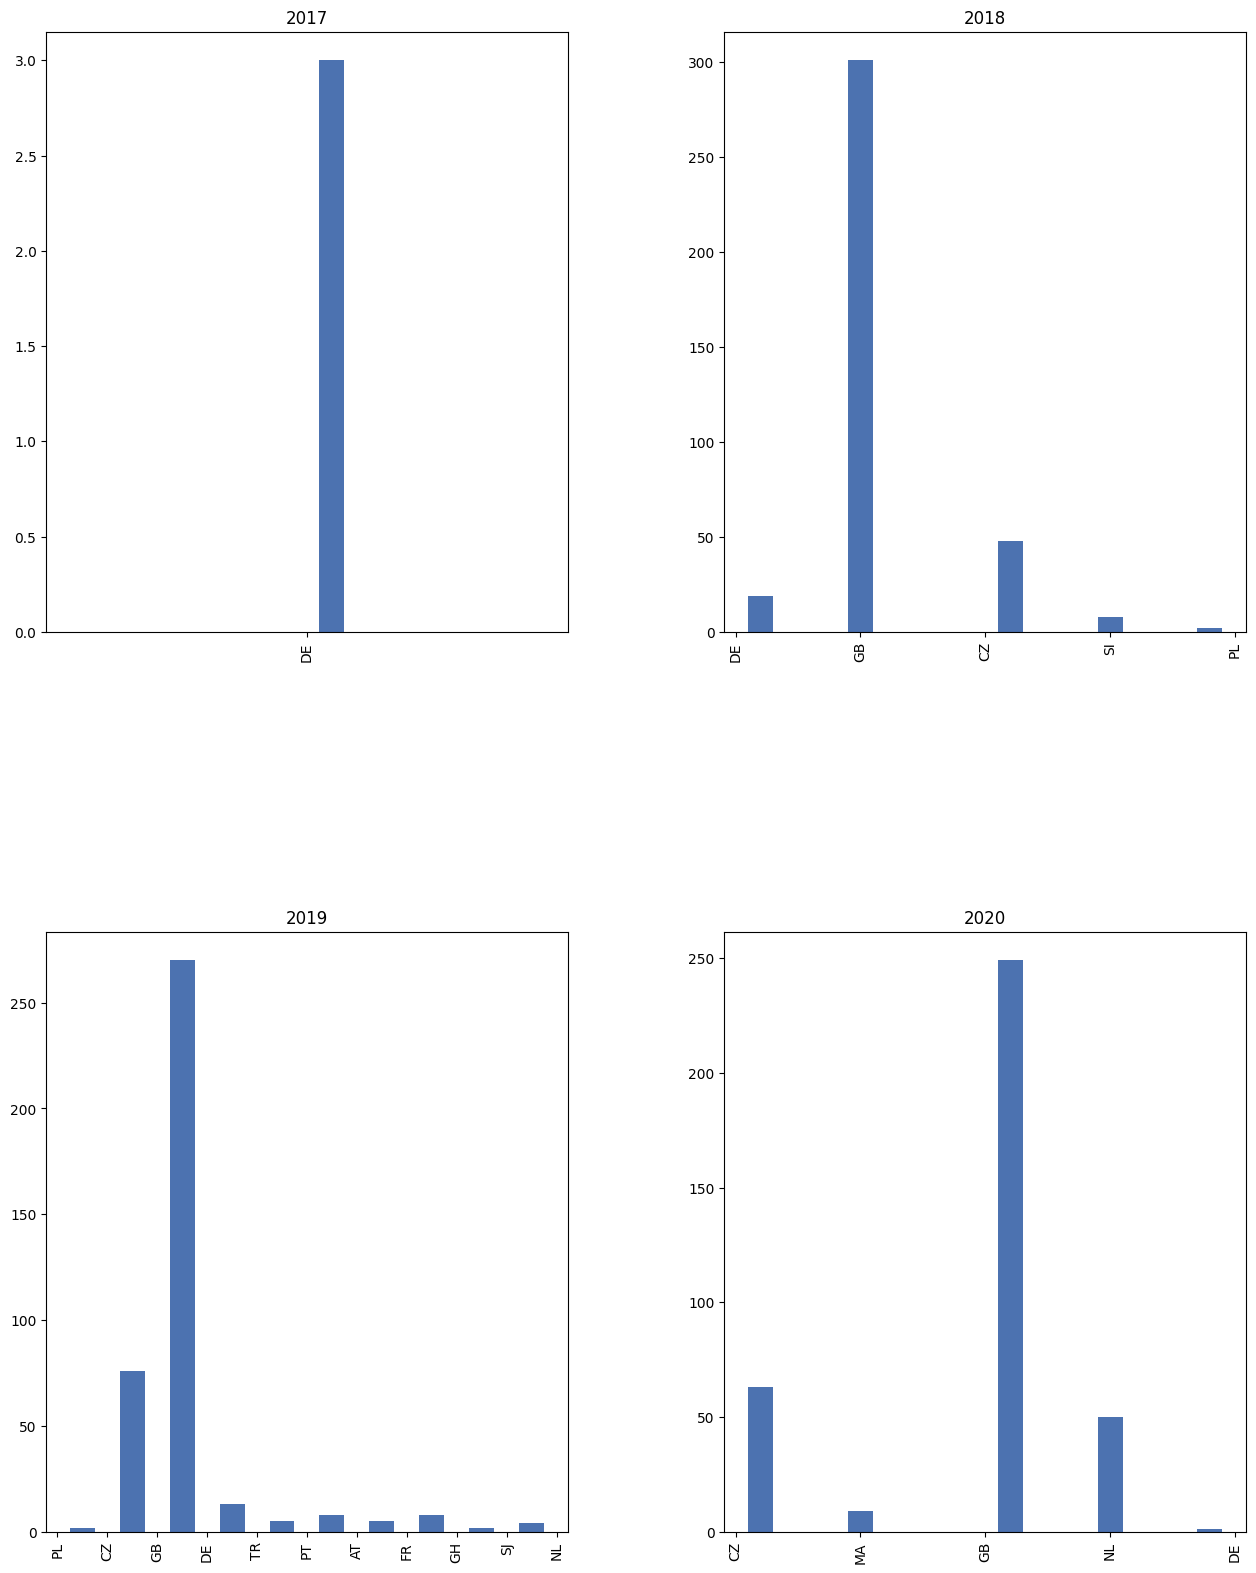

In [14]:
plt.style.use('seaborn-deep')
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

when.day_df['country_code'].hist(by=when.day_df.index.year, ax=ax, rwidth=0.5)